Задание 1.
Выберите датасет, который имеет отношение к вашей области интересов или исследований. Датасет должен содержать неструктурированные данные, требующие разметки для решения конкретной задачи, например, анализа настроений или распознавания именованных сущностей.

Задание 2.
Выполните разметку на основе правил (rule-based labeling) на подмножестве выбранного датасета. Разработайте и реализуйте набор правил или условий, которые позволят автоматически присваивать метки данным на основе определенных шаблонов или критериев.

Задача 3.
Выполните разметку вручную отдельного подмножества выбранного датасета с помощью выбранного вами инструмента разметки.

Задача 4.
Объедините данные, размеченные вручную, с данными, размеченными на основе правил. Объедините два подмножества размеченных данных в один набор данных, сохранив при этом соответствующую структуру и целостность.

Задача 5.
Обучите модель машинного обучения, используя объединенный набор размеченных данных. Разделите датасет на обучающий и тестовый наборы и используйте обучающий набор для обучения модели.

Задача 6.
Оценить эффективность обученной модели на тестовом датасете. Используйте подходящие метрики оценки. Интерпретируйте результаты и проанализируйте эффективность модели в решении задачи разметки.

In [8]:
import pandas as pd
import seaborn as sns

In [29]:
from sklearn.model_selection import train_test_split # Для разделения данных на обучающую и тестовую выборку
from sklearn.feature_extraction.text import TfidfVectorizer # для преобразования текста в вектор
from sklearn.linear_model import LogisticRegression # использование модели логистической регрессии
from sklearn.metrics import accuracy_score, classification_report # оценка производительности модели
from sklearn.pipeline import Pipeline # конвеер обработки данных

In [34]:
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('/Users/svetlanaponamarenko/Downloads/archive (1)/Drug Reviews (Drugs.com)/drugsComTrain_raw.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


In [4]:
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


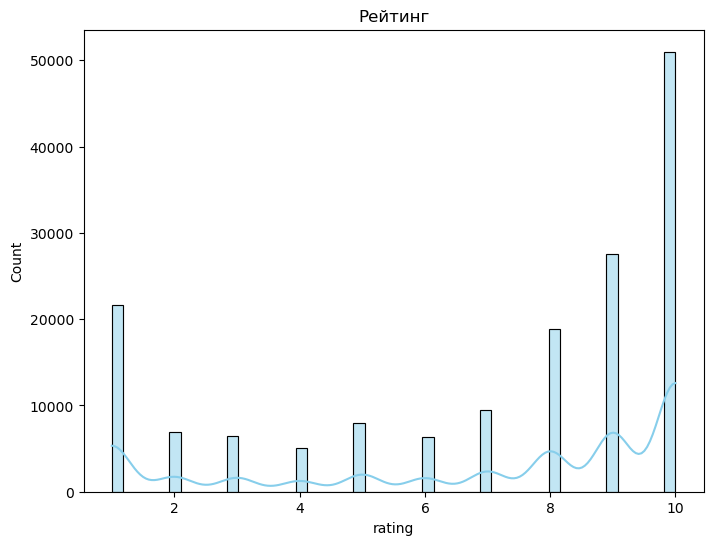

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(df['rating'], kde=True, color='skyblue')
plt.title('Рейтинг')
plt.show()

In [15]:
subset = df.sample(frac=0.00025) # создаем случайную подвыборку из исходного DF

In [16]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 101356 to 110172
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   40 non-null     int64  
 1   drugName     40 non-null     object 
 2   condition    40 non-null     object 
 3   review       40 non-null     object 
 4   rating       40 non-null     float64
 5   date         40 non-null     object 
 6   usefulCount  40 non-null     int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 2.5+ KB


In [17]:
subset.to_csv('subset_ht9.csv', index=False)

In [18]:
subset = pd.read_csv('/Users/svetlanaponamarenko/Downloads/project-4-at-2024-06-11-18-59-6fa59219.csv')

In [20]:
subset.head()

,Unnamed: 0,annotation_id,annotator,condition,created_at,date,drugName,id,lead_time,rating,review,sentiment,updated_at,usefulCount
0,23386,13,1,Opiate Withdrawal,2024-06-11T18:53:06.253133Z,"August 15, 2013",Methadone,93,3.238,10.0,"""I&#039;ve been taking Methadone disks for 5 y...",high,2024-06-11T18:53:06.253156Z,48
1,134882,14,1,Renal Cell Carcinoma,2024-06-11T18:53:35.600856Z,"August 4, 2017",Pazopanib,94,3.726,9.0,"""Update-tolerating Votrient 400mg. Last 2 scan...",high,2024-06-11T18:53:35.600891Z,1
2,215839,15,1,Birth Control,2024-06-11T18:53:43.534220Z,"August 19, 2016",Copper,95,2.278,1.0,"""My first expulsion happened two days after in...",low,2024-06-11T18:53:43.534250Z,1
3,187368,16,1,Juvenile Idiopathic Arthritis,2024-06-11T18:54:40.290844Z,"February 17, 2017",Orencia,96,6.570,7.0,"""I loved it til I had my first reaction after ...",medium,2024-06-11T18:55:19.992298Z,2
4,51789,17,1,Methicillin-Resistant Staphylococcus Aureus In...,2024-06-11T18:54:44.743685Z,"September 3, 2015",Zyvox,97,6.707,10.0,"""I got a breast infection that was found to be...",high,2024-06-11T18:55:31.713890Z,6


In [19]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     40 non-null     int64  
 1   annotation_id  40 non-null     int64  
 2   annotator      40 non-null     int64  
 3   condition      40 non-null     object 
 4   created_at     40 non-null     object 
 5   date           40 non-null     object 
 6   drugName       40 non-null     object 
 7   id             40 non-null     int64  
 8   lead_time      40 non-null     float64
 9   rating         40 non-null     float64
 10  review         40 non-null     object 
 11  sentiment      40 non-null     object 
 12  updated_at     40 non-null     object 
 13  usefulCount    40 non-null     int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 4.5+ KB


In [22]:
del subset['annotation_id']
del subset['annotator']
del subset['condition']
del subset['updated_at']
del subset['created_at']
del subset['lead_time']

In [23]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   40 non-null     int64  
 1   date         40 non-null     object 
 2   drugName     40 non-null     object 
 3   id           40 non-null     int64  
 4   rating       40 non-null     float64
 5   review       40 non-null     object 
 6   sentiment    40 non-null     object 
 7   usefulCount  40 non-null     int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 2.6+ KB


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


In [24]:
del df['Unnamed: 0']
del subset['Unnamed: 0']

In [25]:
df.drop(subset.index, axis=0,inplace=True)

In [26]:
df.shape

(161257, 6)

In [28]:
df.loc[df['rating']>=8, 'sentiment'] = 'High'
df.loc[(df['rating']<8) & (df['rating']>=5), 'sentiment'] = 'Medium'
df.loc[df['rating']<5, 'sentiment'] = 'Low'

In [31]:
df = pd.concat([df, subset])

In [35]:
label_encoder = LabelEncoder()
df['category_rating'] = label_encoder.fit_transform(df['sentiment'])

In [36]:
df.head()

,drugName,condition,review,rating,date,usefulCount,sentiment,id,category_rating
40,Fluconazole,Vaginal Yeast Infection,"""I am very prone to yeast infections, I believ...",8.0,"April 24, 2017",9,High,NaN,0
41,Contrave,Obesity,"""I am just finishing my second week taking Con...",8.0,"November 4, 2015",9,High,NaN,0
42,Clonazepam,Panic Disorde,"""This medication changed my life. My panic at...",9.0,"April 1, 2008",30,High,NaN,0
43,Metaxalone,Muscle Spasm,"""I have been taking this medicine due to lower...",5.0,"June 4, 2014",55,Medium,NaN,2
44,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4.0,"April 27, 2016",3,Low,NaN,1


In [37]:
X_train, X_test, y_train, y_test = train_test_split(
df['review'],
df['category_rating'],
test_size=0.2, 
random_state=42 
)

In [41]:
pipeline = Pipeline([
('tfidf', TfidfVectorizer(stop_words='english')),
('clf', LogisticRegression(max_iter=5000))
])

In [42]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('clf', LogisticRegression(max_iter=5000))])

In [43]:
predictions = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions) 
report = classification_report(y_test, predictions)

print(f"Точность модели {accuracy}")
print('Отчет по классификации')
print(report)

Точность модели 0.7530378177309361
Отчет по классификации
              precision    recall  f1-score   support

           0       0.79      0.92      0.85     19570
           1       0.71      0.69      0.70      7926
           2       0.47      0.15      0.23      4757
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2

    accuracy                           0.75     32260
   macro avg       0.33      0.30      0.30     32260
weighted avg       0.72      0.75      0.72     32260



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
